In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

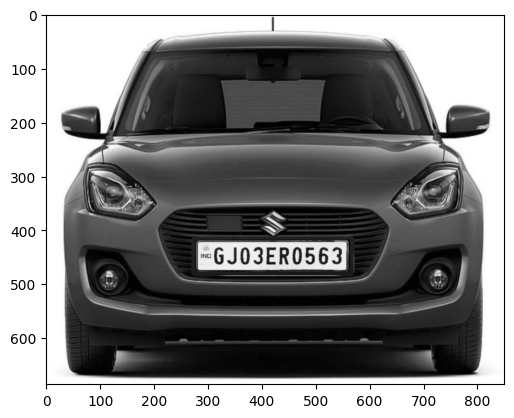

In [ ]:
image=cv2.imread("car.jpg")
grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(grey,cmap="gray")
plt.show()

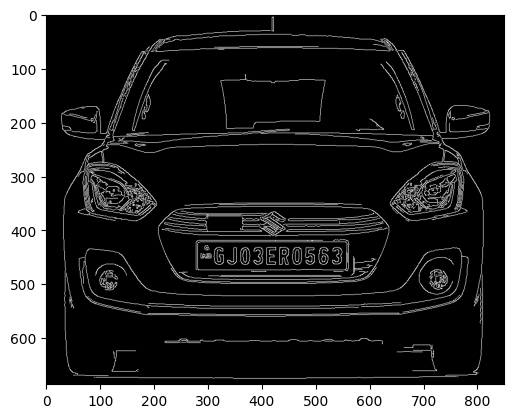

In [ ]:
blur=cv2.bilateralFilter(grey,11,17,17)
canny=cv2.Canny(blur,30,200)
plt.imshow(canny,cmap="gray")
plt.show()

In [ ]:
key_points=cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(key_points)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [ ]:
location=None
for cont in contours:
    pol=cv2.approxPolyDP(cont,10,True)
    if len(pol)==4:
        location=pol
location

array([[[281, 425]],

       [[555, 422]],

       [[557, 471]],

       [[284, 474]]], dtype=int32)

In [ ]:
print(location)

[[[281 425]]

 [[555 422]]

 [[557 471]]

 [[284 474]]]


In [ ]:
mask=np.zeros(grey.shape,np.uint8)

In [ ]:
new_image=cv2.drawContours(mask,[location],0,255,-1)
final=cv2.bitwise_and(image,image,mask=mask)

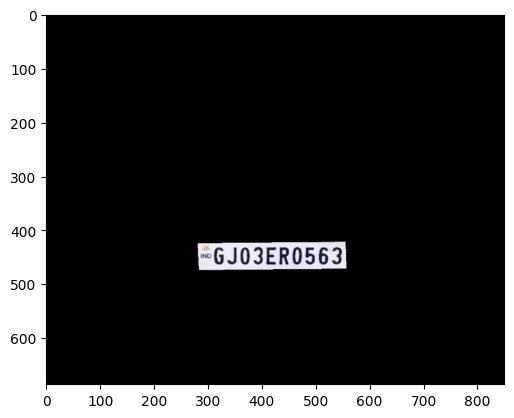

In [ ]:
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))

In [ ]:
img=grey[x1:x2+1,y1:y2+1]

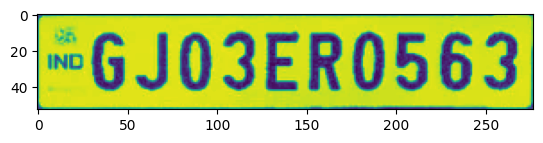

In [ ]:
plt.imshow(img)

In [ ]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext(img)

In [ ]:
result

[([[5, 21], [29, 21], [29, 33], [5, 33]], 'IND', 0.6133707617461359),
 ([[22, 2], [276, 2], [276, 50], [22, 50]], '6JO3ER0563', 0.8068758927895248)]